In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [16]:
from pathlib import Path
import pickle
from PIL import Image

import matplotlib.pyplot as plt

from fastai.vision import ImageDataBunch
from fastai.vision import LabelLists
from fastai.vision import get_transforms

In [22]:
import torch; torch.__version__

'1.2.0.dev20190726'

In [32]:
cifar100_stats = (torch.tensor([0.5070751592371323, 0.48654887331495095, 0.4409178433670343]),
 torch.tensor([0.26733428587924035, 0.2564384629170881, 0.2761504713256853]))

In [29]:
path = Path('cifar100')
train_file = 'train'
test_file = 'test'

In [31]:
data = ImageDataBunch.from_folder(path,
                                  train='train_data',
                                  valid='valid_data',
                                  ds_tfms=get_transforms(),
                                  num_workers=0,
                                  bs=1024
                                 )


In [33]:
data.normalize(cifar100_stats)

ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
0,0,0,0,0
Path: cifar100;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
0,0,0,0,0
Path: cifar100;

Test: None

Wall time: 34.6 s


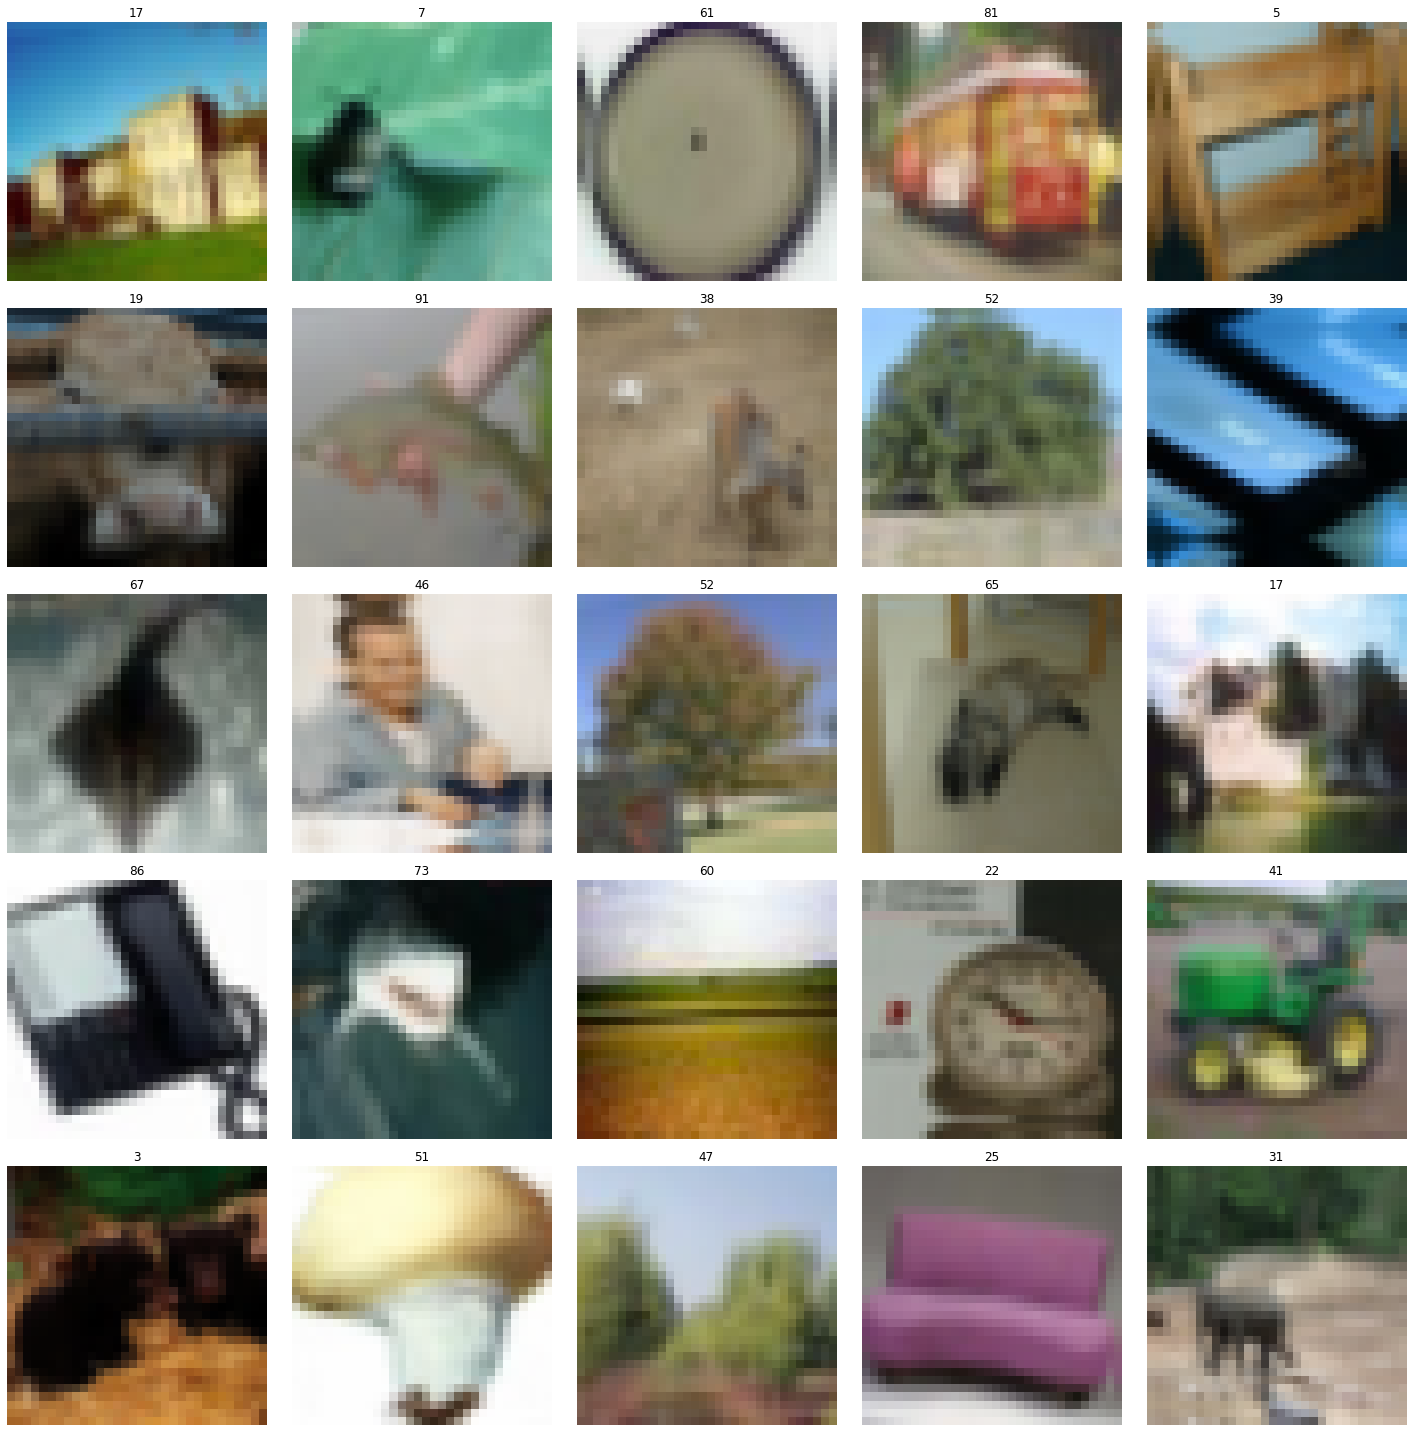

In [10]:
%%time
data.show_batch()

In [34]:
from torchvision import models
from fastai.vision import cnn_learner, accuracy, error_rate

In [41]:
learn = cnn_learner(data, models.resnet18, metrics=[error_rate, accuracy], pretrained=False)

In [43]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


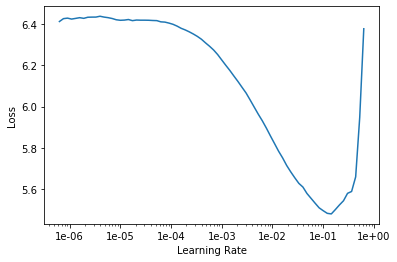

In [44]:
learn.recorder.plot()

In [45]:
from fastai.callbacks import SaveModelCallback

In [48]:
learn.fit_one_cycle(100, 1e-2, callbacks=SaveModelCallback(learn, name='resnet18_best'))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,3.684599,3.539095,0.829400,0.170600,01:23
1,3.661116,3.533884,0.826100,0.173900,01:28
2,3.637584,3.443019,0.818800,0.181200,01:33
3,3.610347,3.404069,0.812100,0.187900,01:28
4,3.566113,3.359666,0.806200,0.193800,01:24
5,3.526471,3.302387,0.796100,0.203900,01:25
6,3.468064,3.265655,0.796300,0.203700,01:25
7,3.423923,3.220798,0.784800,0.215200,01:24
8,3.349041,3.119599,0.763500,0.236500,01:24
9,3.266848,3.068004,0.756500,0.243500,01:27


Better model found at epoch 0 with valid_loss value: 3.539094924926758.
Better model found at epoch 1 with valid_loss value: 3.533884286880493.
Better model found at epoch 2 with valid_loss value: 3.443019151687622.
Better model found at epoch 3 with valid_loss value: 3.4040687084198.
Better model found at epoch 4 with valid_loss value: 3.359665632247925.
Better model found at epoch 5 with valid_loss value: 3.302386999130249.
Better model found at epoch 6 with valid_loss value: 3.265655279159546.
Better model found at epoch 7 with valid_loss value: 3.2207984924316406.
Better model found at epoch 8 with valid_loss value: 3.1195993423461914.
Better model found at epoch 9 with valid_loss value: 3.0680043697357178.
Better model found at epoch 10 with valid_loss value: 2.9930527210235596.
Better model found at epoch 11 with valid_loss value: 2.921499490737915.
Better model found at epoch 12 with valid_loss value: 2.8831677436828613.
Better model found at epoch 14 with valid_loss value: 2.78

KeyboardInterrupt: 

In [49]:
learn.mixup()

Learner(data=ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
0,0,0,0,0
Path: cifar100;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
0,0,0,0,0
Path: cifar100;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (co

In [50]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


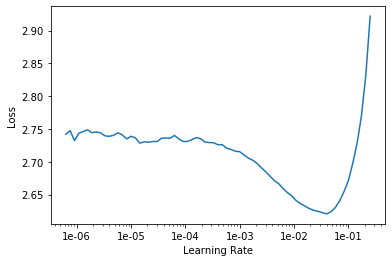

In [51]:
learn.recorder.plot()

In [52]:
learn.fit_one_cycle(20, 8e-3, callbacks=SaveModelCallback(learn, name='resnet18_mixup_best'))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.612432,1.951376,0.509300,0.490700,01:21
1,2.451968,1.908818,0.496900,0.503100,01:22
2,2.371654,1.894474,0.487900,0.512100,01:21
3,2.347642,1.953148,0.507500,0.492500,01:31
4,2.346386,2.041557,0.522100,0.477900,01:32
5,2.357399,2.032150,0.516900,0.483100,01:34
6,2.351927,1.975747,0.507700,0.492300,01:29
7,2.330228,2.028065,0.514800,0.485200,01:29
8,2.309005,1.983214,0.506500,0.493500,01:29
9,2.266371,1.995203,0.508300,0.491700,01:29


Better model found at epoch 0 with valid_loss value: 1.95137619972229.
Better model found at epoch 1 with valid_loss value: 1.9088181257247925.
Better model found at epoch 2 with valid_loss value: 1.8944743871688843.
Better model found at epoch 17 with valid_loss value: 1.8790210485458374.
Better model found at epoch 18 with valid_loss value: 1.8781919479370117.


In [53]:
learn.fit_one_cycle(60, 2e-4, callbacks=SaveModelCallback(learn, name='resnet18_mixup_best2'), wd=0.1)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.899604,1.879239,0.471700,0.528300,01:23
1,1.886573,1.877223,0.470900,0.529100,01:24
2,1.887426,1.877854,0.471400,0.528600,01:23
3,1.898541,1.878977,0.471300,0.528700,01:21
4,1.893189,1.873574,0.470300,0.529700,01:25
5,1.885780,1.873764,0.472000,0.528000,01:22
6,1.881801,1.876105,0.470700,0.529300,01:21
7,1.886459,1.876190,0.470900,0.529100,01:21
8,1.889211,1.871285,0.469600,0.530400,01:21
9,1.886887,1.869621,0.469000,0.531000,01:21


Better model found at epoch 0 with valid_loss value: 1.8792387247085571.
Better model found at epoch 1 with valid_loss value: 1.877223014831543.
Better model found at epoch 4 with valid_loss value: 1.873573660850525.
Better model found at epoch 8 with valid_loss value: 1.871285319328308.
Better model found at epoch 9 with valid_loss value: 1.8696205615997314.
Better model found at epoch 11 with valid_loss value: 1.8672223091125488.
Better model found at epoch 18 with valid_loss value: 1.864001750946045.


In [55]:
# learn.loss_func??

In [56]:
learn.save('mixup60')

In [ ]:
# learn.save('20')